#Parkinson Detection dataset using multiple model

The purpose of the dataset exploration is to detect the outcome of parkinson based on the given attribute as follows:

Name - ASCII subject name and recording number
MDVP:Fo(Hz) - Average vocal fundamental frequency
MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of
fundamental frequency variation




In [147]:
import pandas as pd #Dataframe
import numpy as np #array manipulation
import matplotlib.pyplot as plt #visualization
import seaborn as sns #Visualization

from sklearn.model_selection import train_test_split  #Splitting train and test data

#Valuation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [148]:
df = pd.read_csv("/content/drive/MyDrive/Python, Data Mining, ETC/Datasets/Parkinsson disease.csv")
df

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [149]:
df.describe

<bound method NDFrame.describe of                name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0    phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1    phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2    phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3    phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4    phon_R01_S01_5      116.014       141.781       110.655         0.01284   
..              ...          ...           ...           ...             ...   
190  phon_R01_S50_2      174.188       230.978        94.261         0.00459   
191  phon_R01_S50_3      209.516       253.017        89.488         0.00564   
192  phon_R01_S50_4      174.688       240.005        74.287         0.01360   
193  phon_R01_S50_5      198.764       396.961        74.904         0.00740   
194  phon_R01_S50_6      214.289       260.277        77.973         0.00567   

     

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [151]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [152]:
df = df.drop(columns='name', axis=1)

#Dropping name column as it doesn't have correlation

In [153]:
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [154]:
df.rename(columns=({'MDVP:Fo(Hz)':'average_frequency',
           'MDVP:Fhi(Hz)':'max_frequency',
           'MDVP:Flo(Hz)':'min_frequency',
           'MDVP:Jitter(%)':'frequency_%',
           'MDVP:Jitter(Abs)':'frequency_absolute',
           'MDVP:RAP':'frequency_rap',
           'MDVP:PPQ':'frequency_ppq',
           'MDVP:Shimmer':'amp_var1',
           'MDVP:Shimmer(dB)':'amp_var2',
           'Shimmer:APQ3':'amp_var3',
           'Shimmer:APQ5':'amp_var4',
           'MDVP:APQ':'amp_var5',
           'Shimmer:DDA':'amp_var6',
           }), inplace=True)


In [155]:
df

,average_frequency,max_frequency,min_frequency,frequency_%,frequency_absolute,frequency_rap,frequency_ppq,Jitter:DDP,amp_var1,amp_var2,...,amp_var6,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [156]:
# Check null value
df.isna().sum() / len(df) * 100

average_frequency     0.0
max_frequency         0.0
min_frequency         0.0
frequency_%           0.0
frequency_absolute    0.0
frequency_rap         0.0
frequency_ppq         0.0
Jitter:DDP            0.0
amp_var1              0.0
amp_var2              0.0
amp_var3              0.0
amp_var4              0.0
amp_var5              0.0
amp_var6              0.0
NHR                   0.0
HNR                   0.0
status                0.0
RPDE                  0.0
DFA                   0.0
spread1               0.0
spread2               0.0
D2                    0.0
PPE                   0.0
dtype: float64

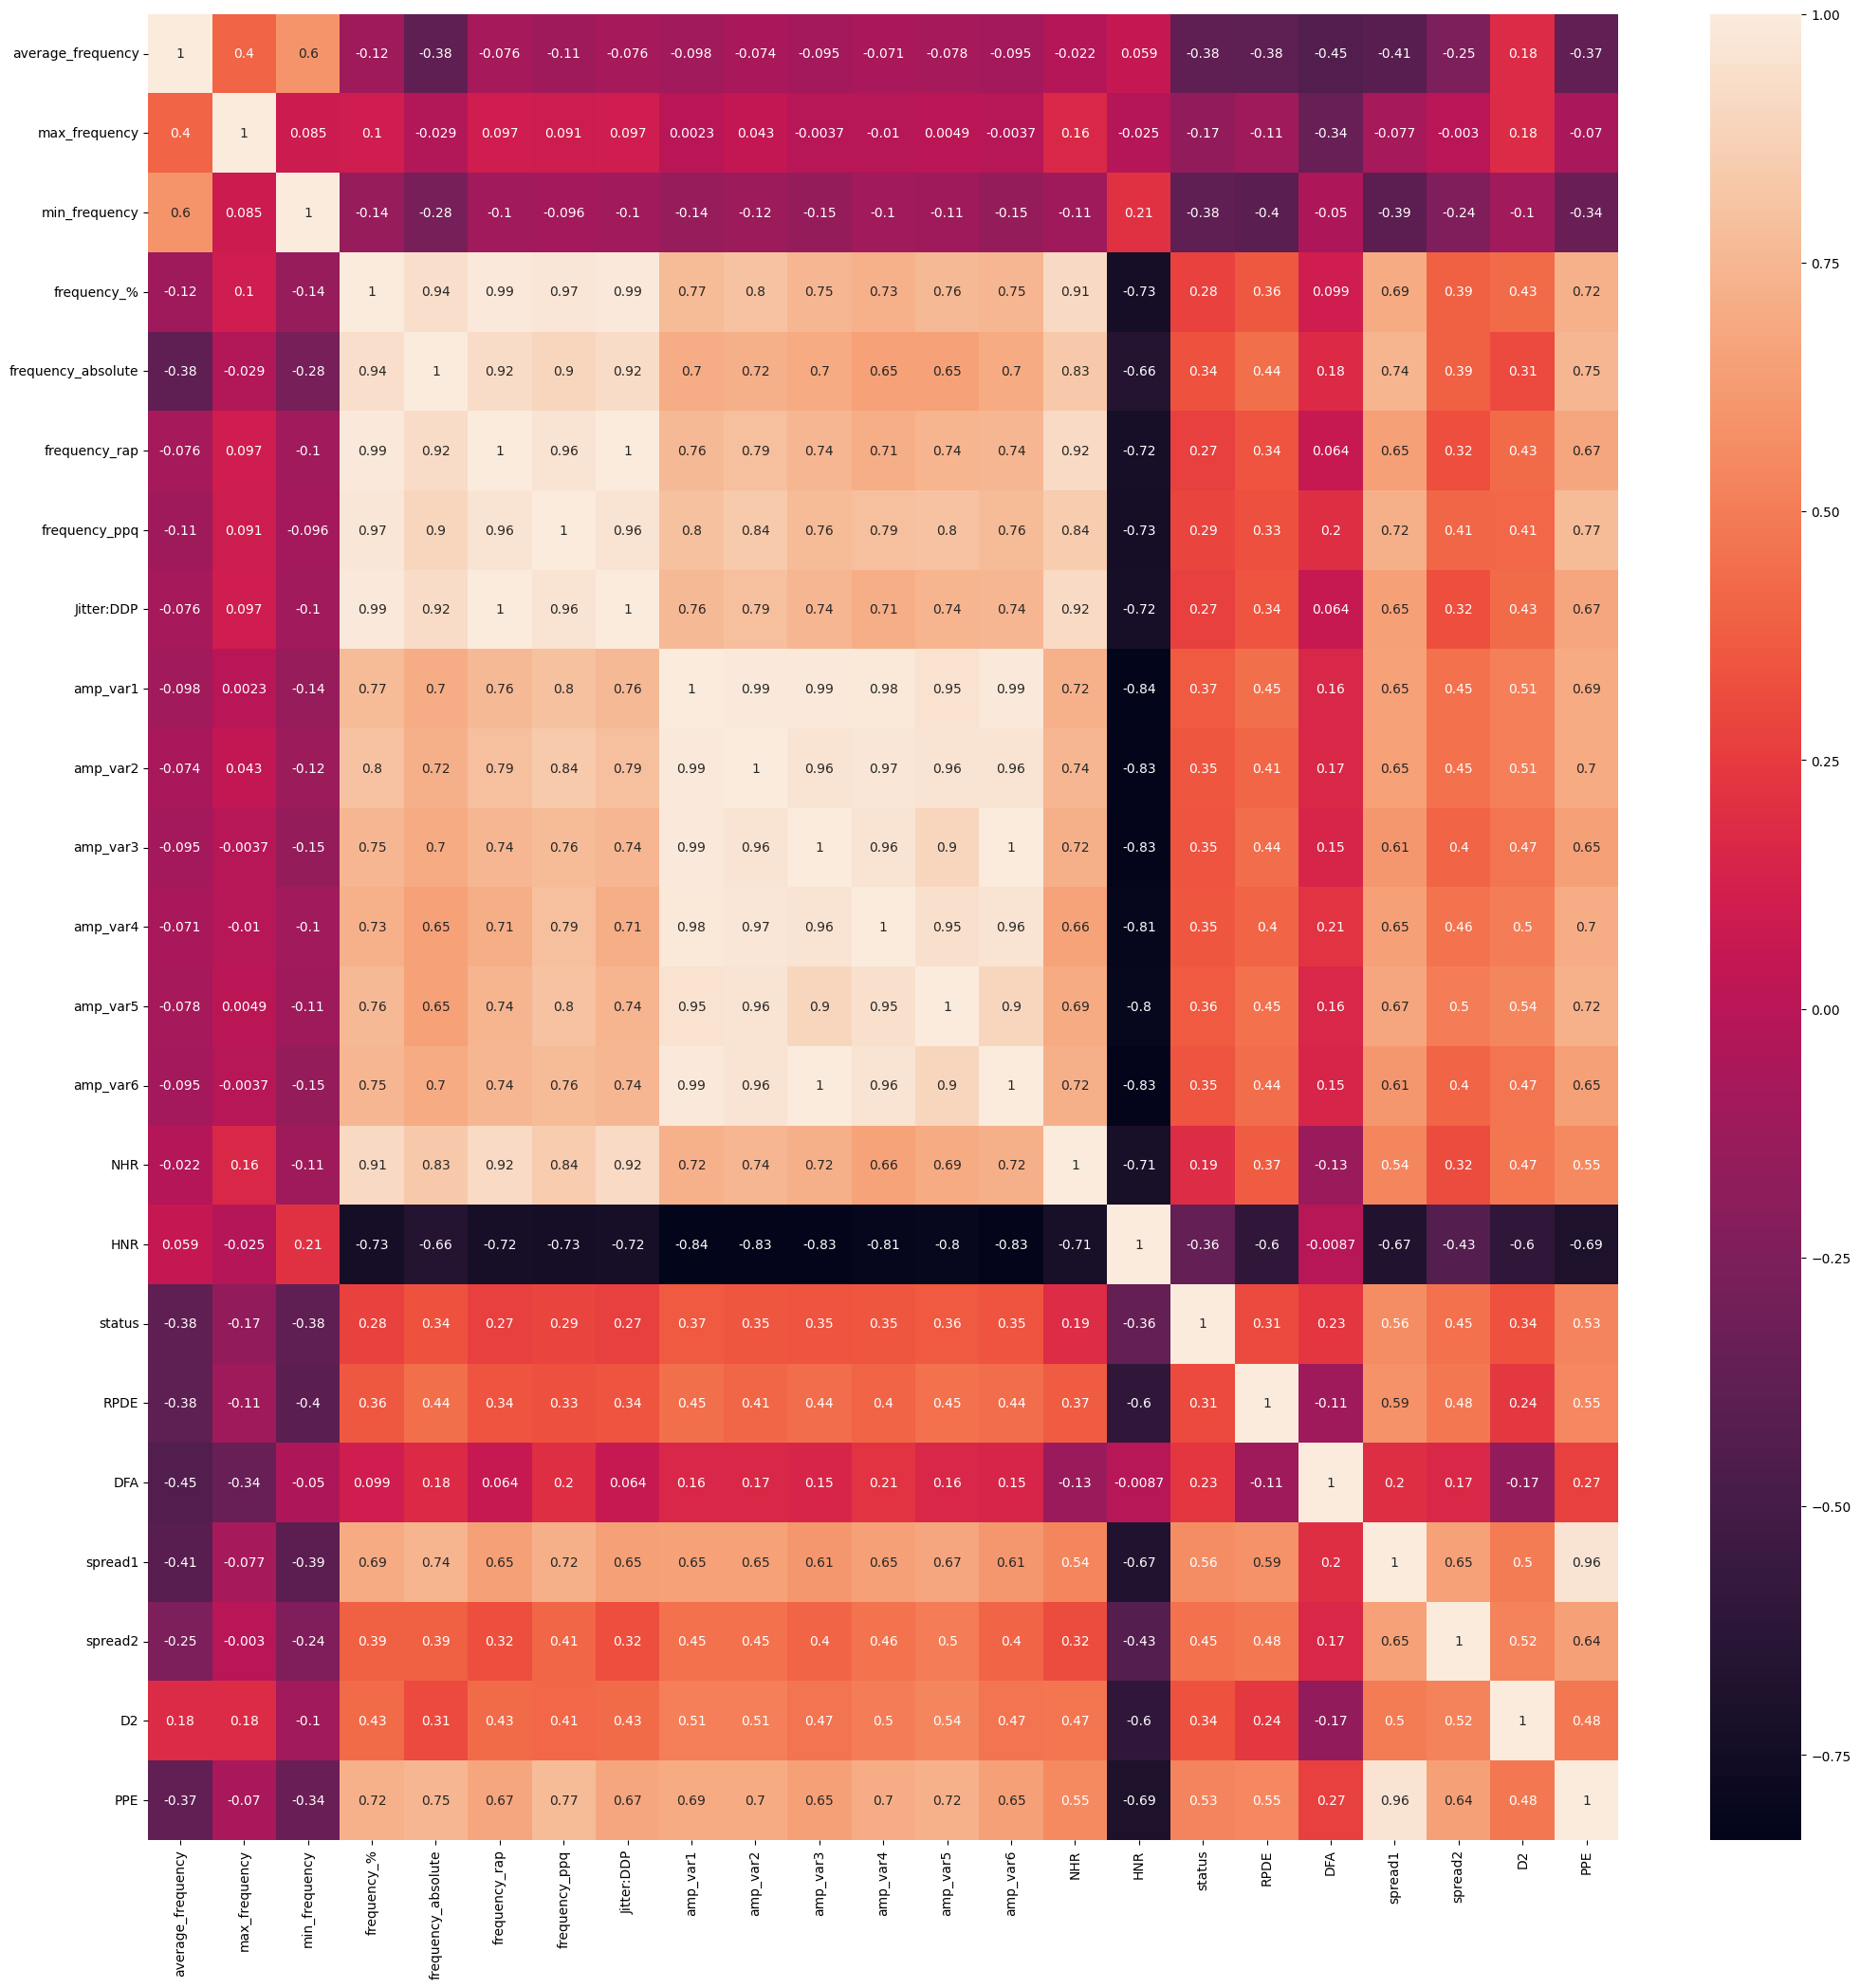

In [157]:
df_corr = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(df_corr, annot=True)
plt.show()


# Selecting feature and splitting Train and Test Data

In [158]:
X = df.drop(columns='status', axis=1)
y = df.status

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [159]:
X.shape

(195, 22)

In [160]:
X_train.shape

(156, 22)

In [161]:
y_train.shape

(39, 22)

#Implementing min max scaler to the dataset

In [162]:
#Import min max scaler
from sklearn.preprocessing import MinMaxScaler

In [163]:
scaler = MinMaxScaler((-1, 1))

In [164]:
scaler

MinMaxScaler(feature_range=(-1, 1))

In [165]:
df = scaler.fit_transform(df)

In [166]:
df

array([[-0.63138346, -0.77481654, -0.89037042, ...,  0.17153026,
        -0.21867743, -0.0053808 ],
       [-0.6033463 , -0.81013911, -0.4433544 , ...,  0.48267409,
        -0.05370956,  0.34265204],
       [-0.66992292, -0.88174367, -0.46942324, ...,  0.37274182,
        -0.18236124,  0.19336492],
       ...,
       [ 0.00546073, -0.43717403, -0.89854572, ..., -0.31484696,
         0.11793486, -0.63884033],
       [ 0.28578581,  0.20361309, -0.89144127, ..., -0.09423055,
        -0.36355605, -0.67372646],
       [ 0.46654868, -0.35441175, -0.85610326, ..., -0.16981039,
         0.00734563, -0.5690805 ]])

In [167]:
X_train.head(5)

,average_frequency,max_frequency,min_frequency,frequency_%,frequency_absolute,frequency_rap,frequency_ppq,Jitter:DDP,amp_var1,amp_var2,...,amp_var5,amp_var6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
5,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,0.456,...,0.03243,0.06985,0.01222,21.378,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
135,110.453,127.611,105.554,0.00494,0.00004,0.00244,0.00315,0.00731,0.04128,0.379,...,0.03316,0.06688,0.02529,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
122,138.190,203.522,83.340,0.00704,0.00005,0.00406,0.00398,0.01218,0.04479,0.441,...,0.03220,0.07761,0.01968,18.305,0.538016,0.741480,-5.418787,0.160267,2.090438,0.229892
167,260.105,264.919,237.303,0.00339,0.00001,0.00205,0.00186,0.00616,0.02030,0.197,...,0.01367,0.03557,0.00910,21.083,0.440988,0.628058,-7.517934,0.160414,1.881767,0.075587
85,180.978,200.125,155.495,0.00406,0.00002,0.00220,0.00244,0.00659,0.03852,0.331,...,0.02877,0.06321,0.02782,16.176,0.583574,0.727747,-5.657899,0.315903,3.098256,0.200423


# I forgot to scale the data, better late than never :D

In [168]:
# Fit and transform the entire DataFrame (except the target)
scaled_df = scaler.fit_transform(X)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=X.columns)

# Concatenate the scaled features with the target variable
scaled_df_with_target = pd.concat([scaled_df, y.reset_index(drop=True)], axis=1)

# Displaying the scaled DataFrame with target variable
print("Scaled DataFrame with target:")
print(scaled_df_with_target)

Scaled DataFrame with target:
     average_frequency  max_frequency  min_frequency  frequency_%  \
0            -0.631383      -0.774817      -0.890370    -0.608640   
1            -0.603346      -0.810139      -0.443354    -0.491741   
2            -0.669923      -0.881744      -0.469423    -0.439644   
3            -0.669993      -0.854145      -0.471599    -0.473316   
4            -0.677701      -0.838182      -0.479786    -0.290978   
..                 ...            ...            ...          ...   
190          -0.000361      -0.474028      -0.668555    -0.815121   
191           0.410975      -0.384051      -0.723514    -0.748412   
192           0.005461      -0.437174      -0.898546    -0.242694   
193           0.285786       0.203613      -0.891441    -0.636595   
194           0.466549      -0.354412      -0.856103    -0.746506   

     frequency_absolute  frequency_rap  frequency_ppq  Jitter:DDP  amp_var1  \
0             -0.501976      -0.709056      -0.504823   -0.709

In [169]:
df2 = scaled_df_with_target
df2

,average_frequency,max_frequency,min_frequency,frequency_%,frequency_absolute,frequency_rap,frequency_ppq,Jitter:DDP,amp_var1,amp_var2,...,amp_var6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,-0.631383,-0.774817,-0.890370,-0.608640,-0.501976,-0.709056,-0.504823,-0.709424,-0.375571,-0.439606,...,-0.334831,-0.863386,0.023490,-0.261689,0.920297,0.139750,0.171530,-0.218677,-0.005381,1
1,-0.603346,-0.810139,-0.443354,-0.491741,-0.422925,-0.617534,-0.352626,-0.617916,-0.054227,-0.110929,...,0.032097,-0.881338,-0.134845,-0.058339,0.954049,0.406554,0.482674,-0.053710,0.342652,1
2,-0.669923,-0.881744,-0.469423,-0.439644,-0.343874,-0.541426,-0.261522,-0.541178,-0.218733,-0.347576,...,-0.113365,-0.920807,-0.007559,-0.191168,1.000000,0.273489,0.372742,-0.182361,0.193365,1
3,-0.669993,-0.854145,-0.471599,-0.473316,-0.343874,-0.581888,-0.350482,-0.582276,-0.171444,-0.290058,...,-0.049044,-0.918006,-0.008128,-0.167490,0.951770,0.391255,0.476177,-0.126046,0.343899,1
4,-0.677701,-0.838182,-0.479786,-0.290978,-0.185771,-0.434489,-0.125402,-0.434259,-0.001095,-0.179951,...,0.169085,-0.891651,-0.089003,-0.249682,0.985626,0.524944,0.027597,-0.191329,0.515223,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,-0.000361,-0.474028,-0.668555,-0.815121,-0.818182,-0.812139,-0.821008,-0.811848,-0.427972,-0.474117,...,-0.275388,-0.828182,-0.099732,-0.104631,-0.333745,-0.484213,-0.479185,0.098097,-0.633364,0
191,0.410975,-0.384051,-0.723514,-0.748412,-0.818182,-0.746628,-0.785638,-0.746348,-0.671901,-0.707477,...,-0.557324,-0.888914,-0.129806,-0.182866,-0.131798,-0.360089,-0.446089,0.210947,-0.484885,0
192,0.005461,-0.437174,-0.898546,-0.242694,-0.422925,-0.464355,-0.494105,-0.464119,-0.752784,-0.718981,...,-0.686738,-0.322023,-0.232545,-0.295363,-0.351402,-0.574111,-0.314847,0.117935,-0.638840,0
193,0.285786,0.203613,-0.891441,-0.636595,-0.739130,-0.709056,-0.680600,-0.709424,-0.754975,-0.743632,...,-0.688022,-0.544323,-0.140128,-0.091649,-0.444842,-0.558699,-0.094231,-0.363556,-0.673726,0


In [170]:
X = df2.drop(columns='status', axis=1)
y = df2.status

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [171]:
print(X_train.shape)
print(y_train.shape)

(156, 22)
(156,)


In [172]:
X_train.head()

,average_frequency,max_frequency,min_frequency,frequency_%,frequency_absolute,frequency_rap,frequency_ppq,Jitter:DDP,amp_var1,amp_var2,...,amp_var5,amp_var6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
5,-0.624863,-0.881535,-0.443723,-0.491741,-0.422925,-0.619461,-0.294748,-0.619843,-0.315866,-0.390304,...,-0.613447,-0.278341,-0.926346,0.051532,-0.258045,0.998255,0.345922,0.318435,-0.320002,0.297506
135,-0.742449,-0.896033,-0.538522,-0.792884,-0.739130,-0.830443,-0.760986,-0.830791,-0.420486,-0.516845,...,-0.602267,-0.316472,-0.843142,-0.246850,0.851958,0.054995,-0.048495,0.421686,0.075246,-0.238735
122,-0.419498,-0.586119,-0.794305,-0.659466,-0.660079,-0.674374,-0.672026,-0.674426,-0.356399,-0.414955,...,-0.616969,-0.178714,-0.878855,-0.198244,0.313385,0.332223,-0.079292,-0.306680,-0.406414,-0.232219
167,1.000000,-0.335460,0.978502,-0.891360,-0.976285,-0.868015,-0.899250,-0.867716,-0.803542,-0.815941,...,-0.900758,-0.718449,-0.946207,0.027554,-0.139402,-0.571516,-0.838346,-0.306018,-0.592076,-0.871391
85,0.078697,-0.599988,0.036524,-0.848793,-0.897233,-0.853565,-0.837085,-0.853909,-0.470878,-0.595727,...,-0.669500,-0.363590,-0.827036,-0.371292,0.525985,0.222799,-0.165755,0.394038,0.490273,-0.354288


#For this instance, I'm going to be using Logistic regression, K nearest neighbor, XGBoostClassifier, Suppport Vector Machine (SVM), LGBMClassifier, Logistic regression, and random forest

First lets import all of them

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

In [174]:
#Activating the algorithms

lr = LogisticRegression()
KNC = KNeighborsClassifier()
svm = SVC()
rf = RandomForestClassifier()
xgb_clf = XGBClassifier()
lgb_clf = LGBMClassifier()

# Hyperparameter tuning for our models, I will be using gridsearchCV

The evaluation will be based on accuracy.

In [175]:
from sklearn.model_selection import GridSearchCV

In [176]:
models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVM': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBClassifier': XGBClassifier(),
}

In [177]:
param_grid = {
    'LogisticRegression': {'C': [0.1, 1, 10, 100], 'penalty': ['l2']},
    'KNeighborsClassifier': {'n_neighbors': [3, 5, 7, 9]},
    'SVM': {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10], 'kernel': ['rbf', 'linear']},
    'RandomForestClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'XGBClassifier': {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]},
}

In [178]:
#Storing result in a new array
results = {}
for model_name, model in models.items():
  grid_search = GridSearchCV(model, param_grid[model_name], cv=15, scoring='accuracy', error_score='raise')
  grid_search.fit(X, y)
  results[model_name] = {
      'best_params' : grid_search.best_params_,
      'best_score' : grid_search.best_score_
      }

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [179]:
for model_name, result in results.items():
    print(f"Results for {model_name}:")
    print("Best Parameters:", result['best_params'])
    print("Best CV Score:", result['best_score'])
    print()

Results for LogisticRegression:
Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Best CV Score: 0.841025641025641

Results for KNeighborsClassifier:
Best Parameters: {'n_neighbors': 5}
Best CV Score: 0.8666666666666668

Results for SVM:
Best Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best CV Score: 0.9128205128205131

Results for RandomForestClassifier:
Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best CV Score: 0.8820512820512824

Results for XGBClassifier:
Best Parameters: {'max_depth': 5, 'n_estimators': 100}
Best CV Score: 0.9230769230769232



# XGBClassifier has the best result

Let's put it to the test

In [220]:
xgb_clf = XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=50,
    colsample_bytree=0.8,
    subsample=0.8,
    gamma = 1,
    reg_alpha = 0.1
)

In [221]:
unique_values_y = np.unique(y)
print(unique_values_y)

[0 1]


In [222]:
X_train.describe()

,average_frequency,max_frequency,min_frequency,frequency_%,frequency_absolute,frequency_rap,frequency_ppq,Jitter:DDP,amp_var1,amp_var2,...,amp_var5,amp_var6,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,...,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,-0.235331,-0.632295,-0.391686,-0.718071,-0.714655,-0.751816,-0.730220,-0.751827,-0.624586,-0.668963,...,-0.735470,-0.565289,-0.843553,0.098490,0.116965,0.177956,-0.198882,-0.016765,-0.151782,-0.343036
std,0.487431,0.353016,0.492344,0.332494,0.293070,0.309154,0.321523,0.309108,0.363428,0.340556,...,0.275838,0.410546,0.276841,0.385556,0.493319,0.436682,0.403759,0.374250,0.349444,0.389502
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.663170,-0.869948,-0.757248,-0.897078,-0.897233,-0.909200,-0.903537,-0.909456,-0.879907,-0.902219,...,-0.916954,-0.860059,-0.969873,-0.131066,-0.245251,-0.168498,-0.492089,-0.241629,-0.408754,-0.637027
50%,-0.297988,-0.725838,-0.523012,-0.815121,-0.818182,-0.844894,-0.834405,-0.845079,-0.756162,-0.789647,...,-0.834750,-0.698164,-0.936277,0.145615,0.091376,0.218437,-0.237290,-0.044674,-0.180508,-0.416821
75%,0.109852,-0.516956,-0.127100,-0.664549,-0.660079,-0.711946,-0.683280,-0.712313,-0.459513,-0.541085,...,-0.641435,-0.373411,-0.852389,0.381675,0.564418,0.505661,0.007313,0.193226,0.075878,-0.146052
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [223]:
y_train.describe()

count    156.000000
mean       0.737179
std        0.441583
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: status, dtype: float64

In [224]:
X_train_matched = X_train.iloc[:len(y_train)]

In [225]:
X_train = X_train_matched

In [226]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [227]:
predict = xgb_clf.predict(X_test)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

In [228]:
pd.DataFrame({'Actual' : y_test, 'predict': predict},)

,Actual,predict
138,1,1
16,1,1
155,1,1
96,1,1
68,1,1
153,1,1
55,1,1
15,1,1
112,1,1
111,1,1


#Classification report

In [229]:
from sklearn.metrics import classification_report


In [231]:
report = classification_report(y_test, predict)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



# The result of the comparison between each model indicates that XGBClassifier is the best one for this particular dataset.

Now we have to save the model using pickle


In [232]:
import pickle

In [233]:
with open('XGBClassifier_model.pkl', 'wb') as file:
  pickle.dump(xgb_clf, file)